<a href="https://colab.research.google.com/github/nitinsharma006/data_science/blob/master/Time_Series/Exponential_Smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
file_path = "/energy consumption.csv"

In [5]:
# Read only the specified columns
columns_to_read = ["DATE", "ENERGY_INDEX"]
data = pd.read_csv(file_path, usecols=columns_to_read)

In [6]:

# Display the resulting DataFrame
print(data)

        DATE  ENERGY_INDEX
0    01/1939        3.3842
1    02/1939        3.4100
2    03/1939        3.4875
3    04/1939        3.5133
4    05/1939        3.5133
..       ...           ...
964  05/2019       91.9046
965  06/2019       98.4397
966  07/2019      112.9469
967  08/2019      111.6645
968  09/2019      102.2911

[969 rows x 2 columns]


In [7]:
df = pd.DataFrame(data)

In [9]:
# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%Y')

In [10]:
# Set DATE as the index
df.set_index('DATE', inplace=True)

In [25]:
# Define a function for each forecasting method
def ses_forecast(data, alpha=0.2):
    forecast = data.ewm(alpha=alpha, adjust=False).mean()
    return forecast

def double_exp_smoothing(data, alpha=0.2, beta=0.2):
    forecast = data.copy()
    level = data.iloc[0]
    trend = 0

    for i in range(1, len(data)):
        last_level, level = level, alpha * data.iloc[i] + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        forecast.iloc[i] = level + trend

    return forecast

In [26]:
def holt_winters(data, seasonal_periods=12, alpha=0.2, beta=0.2, gamma=0.2):
    model = ExponentialSmoothing(data, trend="add", seasonal="add", seasonal_periods=seasonal_periods)
    result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
    forecast = result.fittedvalues.append(result.forecast(36))
    return forecast

In [27]:
# Apply forecasting methods
ses_forecast = ses_forecast(df['ENERGY_INDEX'])
double_exp_forecast = double_exp_smoothing(df['ENERGY_INDEX'])
holt_winters_forecast = holt_winters(df['ENERGY_INDEX'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-26-b65e1b119e85>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  result = model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
<ipython-input-26-b65e1b119e85>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast = result.fittedvalues.append(result.forecast(36))


In [28]:
# Trim or extend holt_winters_forecast to match the length of df.index
holt_winters_forecast = holt_winters_forecast[:len(df.index)]

In [29]:
# Plot the results
import matplotlib.pyplot as plt

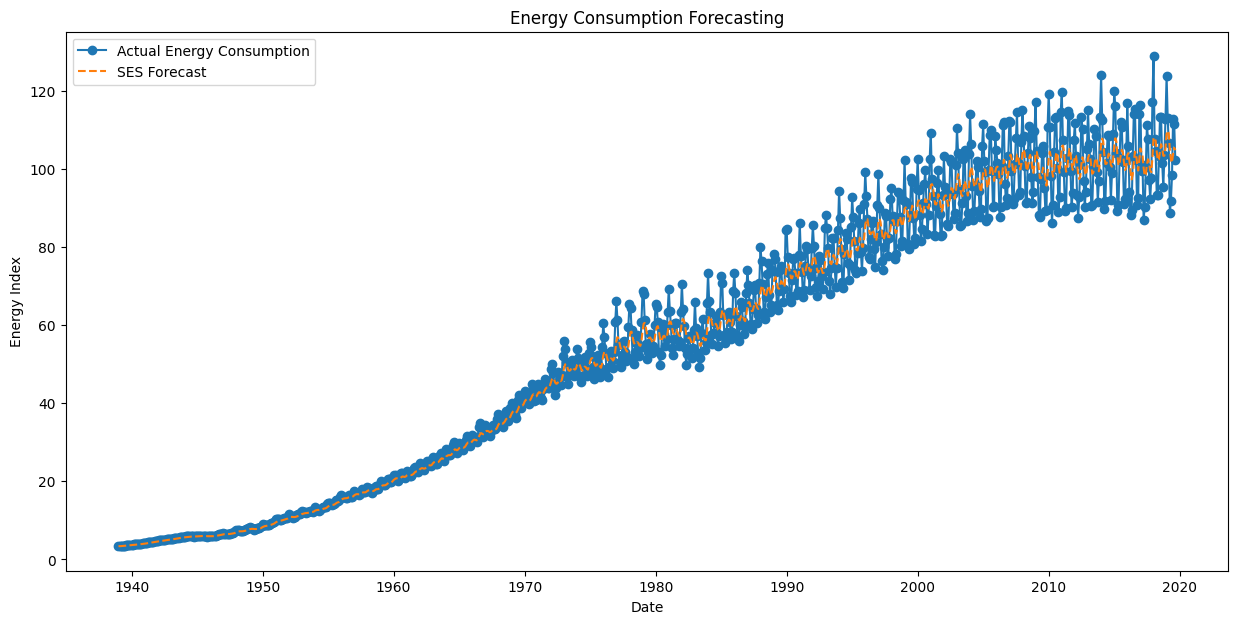

In [34]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['ENERGY_INDEX'], label='Actual Energy Consumption', marker='o')
plt.plot(df.index, ses_forecast, label='SES Forecast', linestyle='--')
plt.legend()
plt.title('Energy Consumption Forecasting')
plt.xlabel('Date')
plt.ylabel('Energy Index')
plt.show()

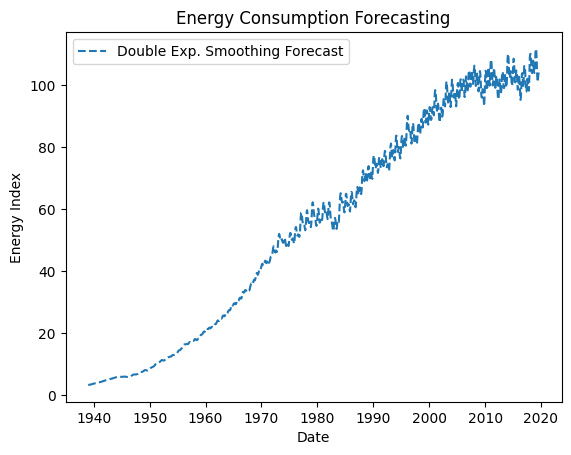

In [33]:
plt.plot(df.index, double_exp_forecast, label='Double Exp. Smoothing Forecast', linestyle='--')
plt.legend()
plt.title('Energy Consumption Forecasting')
plt.xlabel('Date')
plt.ylabel('Energy Index')
plt.show()

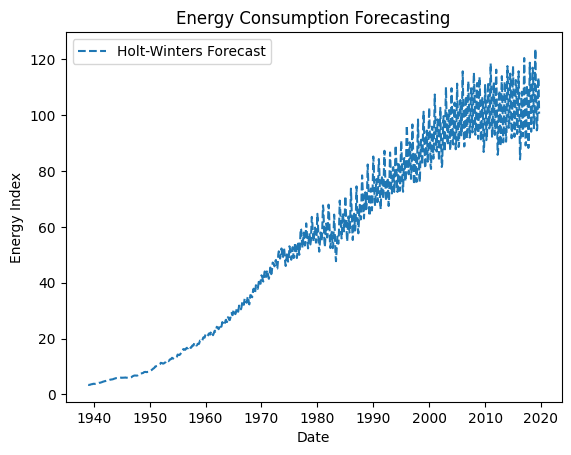

In [32]:
plt.plot(df.index, holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.legend()
plt.title('Energy Consumption Forecasting')
plt.xlabel('Date')
plt.ylabel('Energy Index')
plt.show()